In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the datasets
cab_data = pd.read_csv('data/Cab_Data.csv')
customer_id = pd.read_csv('data/Customer_ID.csv')
transaction_id = pd.read_csv('data/Transaction_ID.csv')
city = pd.read_csv('data/City.csv')

#### Getting a preliminary feel of the data

In [3]:
#Looking at the first few rows of the cab data
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
#Information on the cab data.
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  float64
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.2+ MB


In [5]:
print('Number of unique cab companies present:', cab_data['Company'].nunique())

Number of unique cab companies present: 2


In [6]:
print('The number of different cities where these cab companies operate:', cab_data['City'].nunique())

The number of different cities where these cab companies operate: 19


In [7]:
print('The name of the cab companies are as follows:', cab_data['Company'].unique())

The name of the cab companies are as follows: ['Pink Cab' 'Yellow Cab']


In [8]:
#Looking at the first few rows of the customer id data
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
#Looking at the first few rows of the transaction id data
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [12]:
#The first 5 rows of the city data
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
#The different cities present in the cities data
city['City'].nunique()

20

In [15]:
#Cities present in the cab_data
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [16]:
#Cities present in the city data
city['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

There are 19 cities in the cab data but 20 in the cities data. I am assuming the number of cities should be the same for both data. Let's try to see which city is missing in the cab data.

In [17]:
cities = list(city['City'].unique())

In [18]:
lost_city = []
for c in cities:
    if c not in list(cab_data['City'].unique()):
        lost_city.append(c)
print('The missing city is:', lost_city)

The missing city is: ['SAN FRANCISCO CA']


#### Exploratory Data Analysis

Each dataset will be explored separately for any inconsistencies and missing values, before they are merged together for further EDA.

#### Exploring the Cab Data

In [19]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  float64
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.2+ MB


In [20]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  float64
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.2+ MB


In [21]:
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632


The date of travel must be converted into a date type

In [22]:
#Importing Datetime to help with the conversion
import datetime

In [23]:
cab_data['Date of Travel'] = pd.TimedeltaIndex(cab_data['Date of Travel'], unit = 'd') + datetime.datetime(1899, 12, 30)

In [24]:
cab_data['Date of Travel'].max()

Timestamp('2018-12-31 00:00:00')

In [25]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [26]:
#Checking for the presence of null values
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [27]:
#descriptive statistics on the cab_data
cab_data[['KM Travelled', 'Price Charged', 'Cost of Trip']].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [28]:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [29]:
customer_id.head(2)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237


In [30]:
#Descriptive statistics on the customer id data
customer_id[['Age', 'Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [31]:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [32]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

### Join Datasets and continue with EDA

In [33]:
#Merging customer id data with transaction id data because of the common customer id column

cust_id_trans_id = pd.merge(customer_id, transaction_id)

In [34]:
cust_id_trans_id.head(3)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card


In [35]:
#merging cab_data with cust_id_trans_id based on the transaction id column

cab_cust_id_trans_id = pd.merge(cab_data, cust_id_trans_id)

In [36]:
cab_cust_id_trans_id.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash


In [37]:
#Merge city data to all previously merged data

data = pd.merge(cab_cust_id_trans_id, city)

In [38]:
data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,"814,885","24,701"


In [39]:
#For some reason i would like to move the customer_id column to the first position.
col_to_first = data.pop('Customer ID')

data.insert(0, "Customer ID", col_to_first)

In [40]:
data.head(3)

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,29290,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,Card,"814,885","24,701"
1,27703,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,Card,"814,885","24,701"
2,28712,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,Cash,"814,885","24,701"


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         359392 non-null  int64         
 1   Transaction ID      359392 non-null  int64         
 2   Date of Travel      359392 non-null  datetime64[ns]
 3   Company             359392 non-null  object        
 4   City                359392 non-null  object        
 5   KM Travelled        359392 non-null  float64       
 6   Price Charged       359392 non-null  float64       
 7   Cost of Trip        359392 non-null  float64       
 8   Gender              359392 non-null  object        
 9   Age                 359392 non-null  int64         
 10  Income (USD/Month)  359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Population          359392 non-null  object        
 13  Users               359392 no

The population and users column wrongly coded as strings instead of numerical.

In [42]:
#Changing the population and users column types to numeric
data['Population'] = data['Population'].str.replace(',', '')
data['Users'] = data['Users'].str.replace(',', '')


data['Population'] = data['Population'].astype('int')
data['Users'] = data['Users'].astype('int')

In [43]:
data.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,29290,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,Card,814885,24701
1,27703,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,Card,814885,24701
2,28712,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,Cash,814885,24701
3,28020,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,Cash,814885,24701
4,27182,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,Card,814885,24701


#### Exploring the numeric and categorical features.

In [44]:
numeric_features = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']
categorical_features = ['Company', 'City', 'Gender']

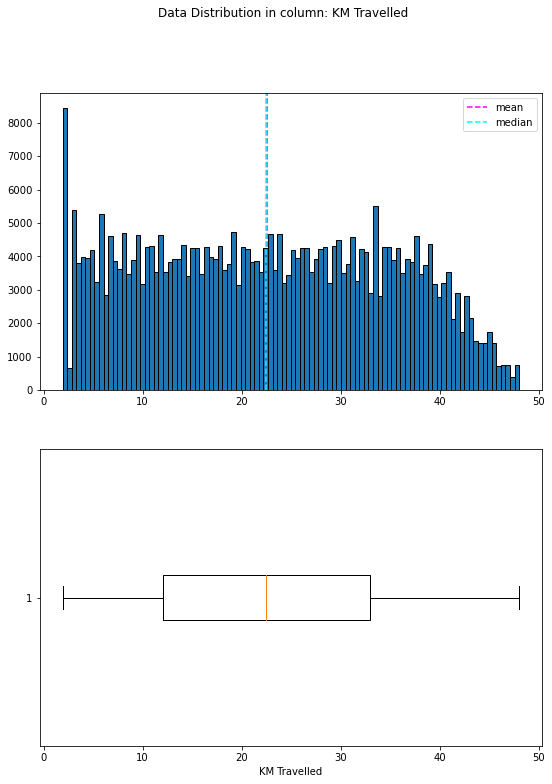

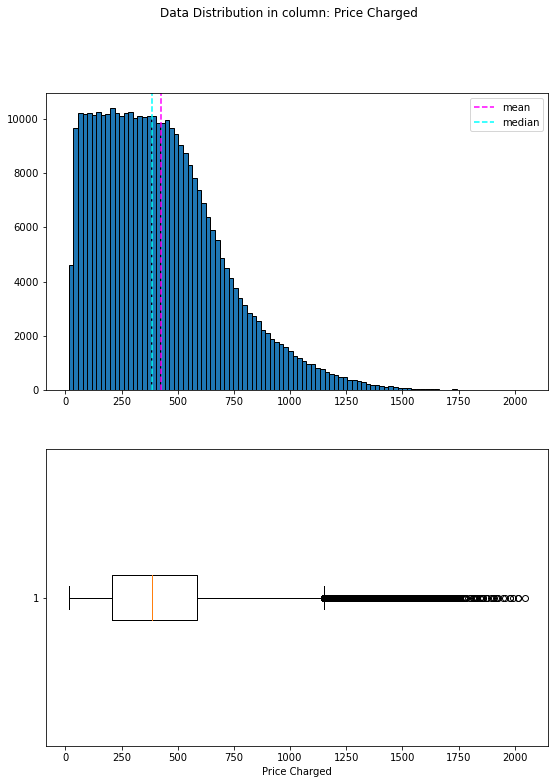

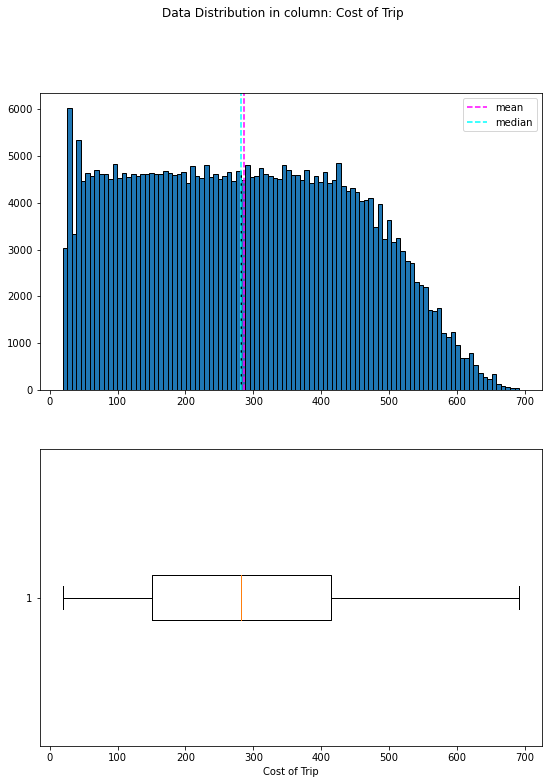

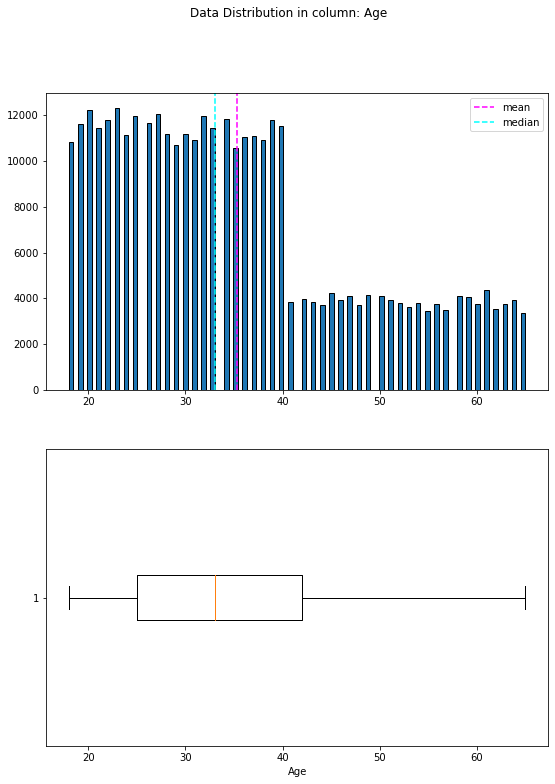

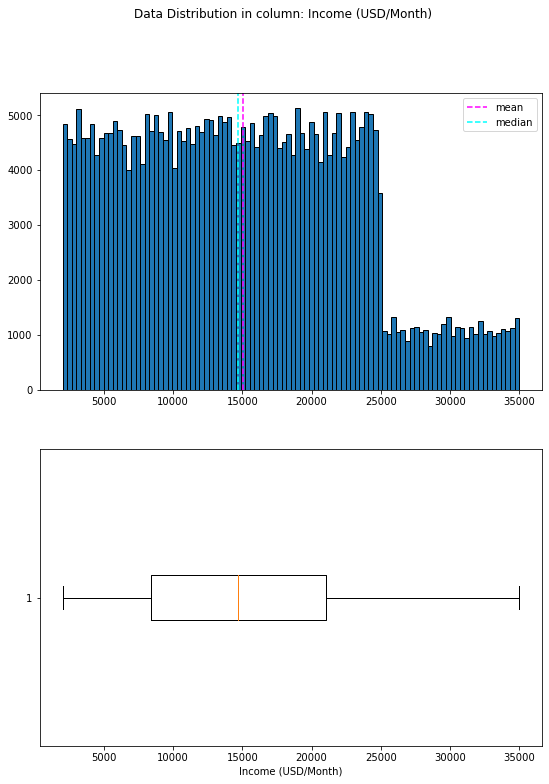

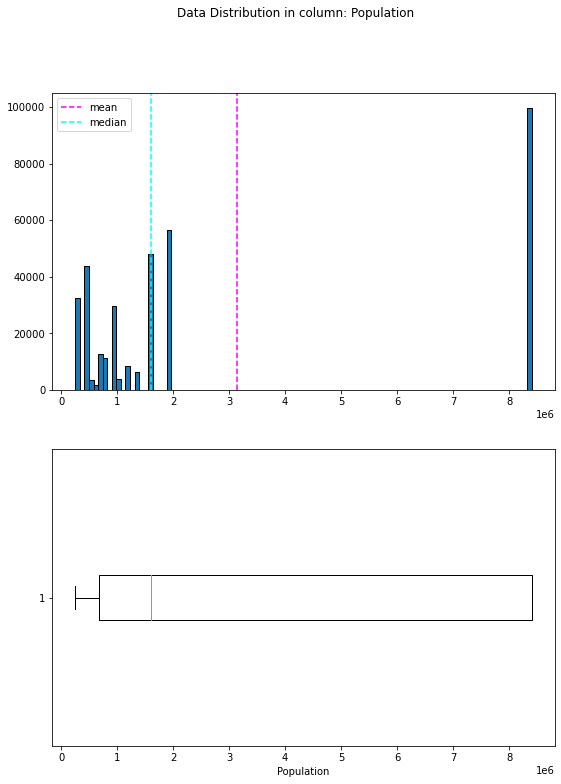

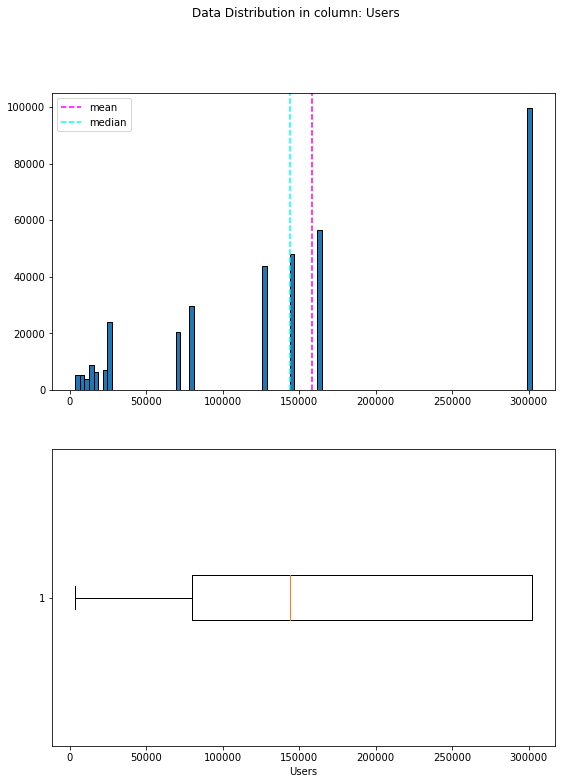

In [45]:
#Exploring the numeric features



#Plot the histograms boxplots

for col in numeric_features:
    #Create a figure 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9, 12))
    feature = data[col]
    ax[0].hist(feature, bins = 100, edgecolor = 'black')
    ax[0].axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', label = 'mean')
    ax[0].axvline(feature.median(), color = 'cyan', linestyle = 'dashed', label = 'median')
    ax[0].legend()
    
    ax[1].boxplot(feature, vert = False)
    ax[1].set_xlabel(col)
    
    fig.suptitle('Data Distribution in column: ' + col)
plt.show()



The plots above tend to show the distribution of the data points in the numeric features. These distributions will help to provide an understanding of the kind of data that we have at hand. 

The datapoints in KM Travelled column are almost evenly spread out. With the mean and median lying almost on the same point, with no outliers present. 

The price charged column is right-skewed, with the mean greater than median and with lots of outliers as shown in the boxplot below the histogram. 

The cost of trip is also slightly skewed to the right, with no outliers.

The distribution of the ages shows that cab rides are more popular among people of age 40 and below.

The income column shows a distribution that suggests that people income above 25000 patronize cab rides less. 


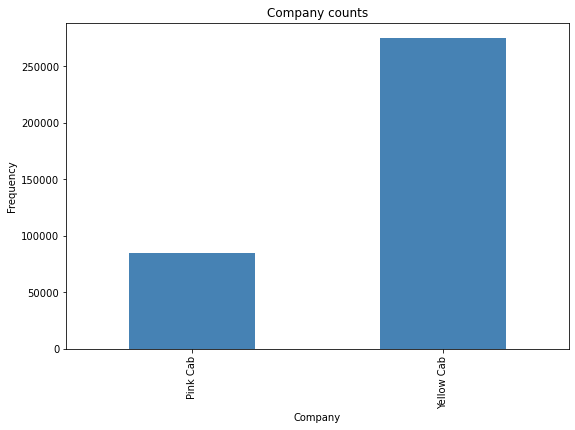

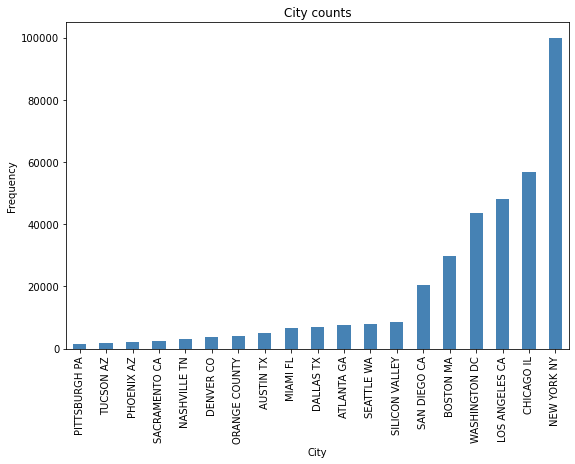

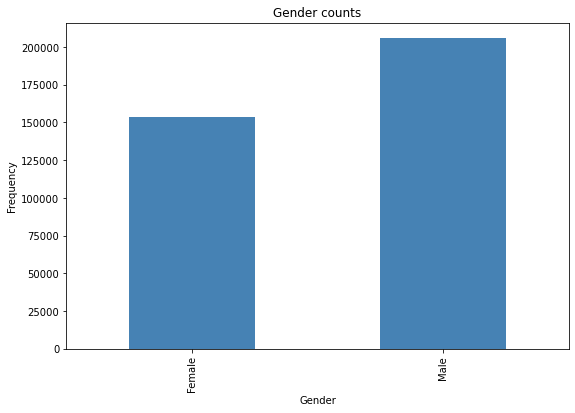

In [46]:
for col in categorical_features:
    counts = data[col].value_counts().sort_values()
    fig = plt.figure(figsize = (9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color = 'steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

Yellow cab had more rides than pink cab. Could this mean yellow cab is the riders' favorite, or it is just by random chance?

More rides happened in the New York, Why? Could be that New York's population is far greater than the other cities so it had more rides. Or are there other factors?

Cab rides are more common among males.



These are the preliminary insights from the data

#### Questions that can be asked of the data (Hypothesis)

- Which month is the busiest for the cab companies?
- Which days are popular among riders?
- Which cabs are more popular across the cities and among the age groups?
- What are the profits of each company over the years?
- Does the payment method have any influence on number of rides?
- What are the number of users for each cap company across the time periods?
- Does the income of the riders have an influence on cab rides?

Grouping the customers into groups according to their age groups. 

In [47]:
ages = data['Age']
print(ages.min())

18


In [48]:
print(ages.max())

65


In [49]:
#creating the bins of ages to group the customers
bins = [0, 19, 29, 39, 49, 59, 69]
labels = ['Teen', 'Young Adult', 'Middle Age', 'Middle Older Age', 'Senior', 'Old']
data['Age Group'] = pd.cut(data['Age'], bins = bins, labels = labels)

In [50]:
#Putting the year in a column
data['Year'] = pd.DatetimeIndex(data['Date of Travel']).year

In [51]:
data.head()

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Age Group,Year
0,29290,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,Card,814885,24701,Young Adult,2016
1,27703,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,Card,814885,24701,Young Adult,2016
2,28712,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,Cash,814885,24701,Senior,2016
3,28020,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,Cash,814885,24701,Young Adult,2016
4,27182,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,Card,814885,24701,Middle Age,2016


In [52]:
data['Month'] = pd.DatetimeIndex(data['Date of Travel']).month

In [53]:
data.sample(10)

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Age Group,Year,Month
318965,53847,10029516,2016-04-23,Yellow Cab,WASHINGTON DC,38.38,824.04,534.2496,Female,23,32899,Cash,418859,127001,Young Adult,2016,4
128541,8511,10172966,2017-05-14,Yellow Cab,LOS ANGELES CA,11.00,181.80,151.8000,Male,42,18643,Card,1595037,144132,Middle Older Age,2017,5
268425,16909,10170940,2017-05-06,Yellow Cab,ORANGE COUNTY,16.80,396.29,205.6320,Female,25,2673,Card,1030185,12994,Young Adult,2017,5
141954,6523,10295438,2018-01-15,Yellow Cab,LOS ANGELES CA,28.00,473.01,342.7200,Male,21,16797,Card,1595037,144132,Young Adult,2018,1
102676,24271,10242793,2017-10-20,Yellow Cab,DALLAS TX,19.26,485.31,265.7880,Male,24,24159,Card,942908,22157,Young Adult,2017,10
11460,33759,10367642,2018-08-28,Pink Cab,AUSTIN TX,19.38,315.71,228.6840,Male,49,14108,Cash,698371,14978,Middle Older Age,2018,8
92931,3693,10389791,2018-10-13,Yellow Cab,CHICAGO IL,47.60,723.17,651.1680,Male,63,24691,Card,1955130,164468,Old,2018,10
260555,2802,10414807,2018-11-20,Yellow Cab,NEW YORK NY,10.78,248.89,130.6536,Female,33,21402,Card,8405837,302149,Middle Age,2018,11
354313,51128,10384494,2018-09-29,Yellow Cab,WASHINGTON DC,10.78,167.13,150.0576,Male,36,4804,Card,418859,127001,Middle Age,2018,9
54833,5604,10096537,2016-10-27,Yellow Cab,CHICAGO IL,27.12,375.00,348.2208,Female,38,6033,Cash,1955130,164468,Middle Age,2016,10


In [54]:
#data = data.sort_values(by = 'Date of Travel', ascending = True)
#data.head()

In [55]:
#months_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
#data['Month'] = data['Month'].map(months_dict)

In [56]:
data.sample(10)

,Customer ID,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users,Age Group,Year,Month
40143,59066,10408863,2018-11-16,Yellow Cab,BOSTON MA,22.80,351.70,284.5440,Male,61,15290,Card,248968,80021,Old,2018,11
211151,2264,10204463,2017-07-30,Yellow Cab,NEW YORK NY,20.88,662.70,278.1216,Male,57,10270,Cash,8405837,302149,Senior,2017,7
32710,59516,10297726,2018-02-01,Pink Cab,BOSTON MA,33.06,394.07,393.4140,Female,39,6232,Cash,248968,80021,Middle Age,2018,2
153523,8721,10397658,2018-10-26,Yellow Cab,LOS ANGELES CA,1.98,29.24,25.1856,Female,26,24284,Card,1595037,144132,Young Adult,2018,10
230183,1580,10278247,2017-12-16,Yellow Cab,NEW YORK NY,41.20,856.11,553.7280,Female,58,34581,Cash,8405837,302149,Senior,2017,12
242855,2971,10339890,2018-06-14,Yellow Cab,NEW YORK NY,4.75,137.50,62.7000,Male,27,20784,Card,8405837,302149,Young Adult,2018,6
330583,52306,10147227,2017-02-17,Yellow Cab,WASHINGTON DC,21.40,452.46,285.0480,Male,57,24845,Cash,418859,127001,Senior,2017,2
200192,1261,10148697,2017-02-21,Yellow Cab,NEW YORK NY,9.28,263.83,131.4048,Female,23,7529,Card,8405837,302149,Young Adult,2017,2
145090,7739,10325291,2018-05-05,Yellow Cab,LOS ANGELES CA,27.00,538.44,333.7200,Female,47,31863,Cash,1595037,144132,Middle Older Age,2018,5
290758,20870,10302929,2018-02-16,Yellow Cab,SAN DIEGO CA,20.23,420.11,288.8844,Female,52,30927,Cash,959307,69995,Senior,2018,2


In [57]:
#count_per_month_yc.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [58]:
#Function to plot number of rides for each company in a given year


def number_of_rides_plotter(df, year, company1, company2):
    """Function to plot number of rides over the given year for a cab company"""
    data = df[df['Year'] == year]
    company1_data = data[data['Company'] == company1]
    company2_data = data[data['Company'] == company2]
    count_per_month_yc1 = company1_data.groupby('Month')['Transaction ID'].count()
    count_per_month_yc2 = company2_data.groupby('Month')['Transaction ID'].count()
    
    
    count_per_month_yc1.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                                 'September', 'October', 'November', 'December']
    count_per_month_yc2.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                                 'September', 'October', 'November', 'December']
    fig = plt.figure(figsize = (12, 9))
    plt.style.use('seaborn-darkgrid')
    plt.plot(count_per_month_yc1, color = 'yellow', linewidth = 2, label = company1)
    plt.plot(count_per_month_yc2, color = 'pink', linewidth = 2, label = company2)
    plt.title('Number of Rides for ' + company1 + ' and ' + company2 + ' in ' + str(year))
    plt.ylabel('Number of Rides')
    plt.xlabel('Month')
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()
    

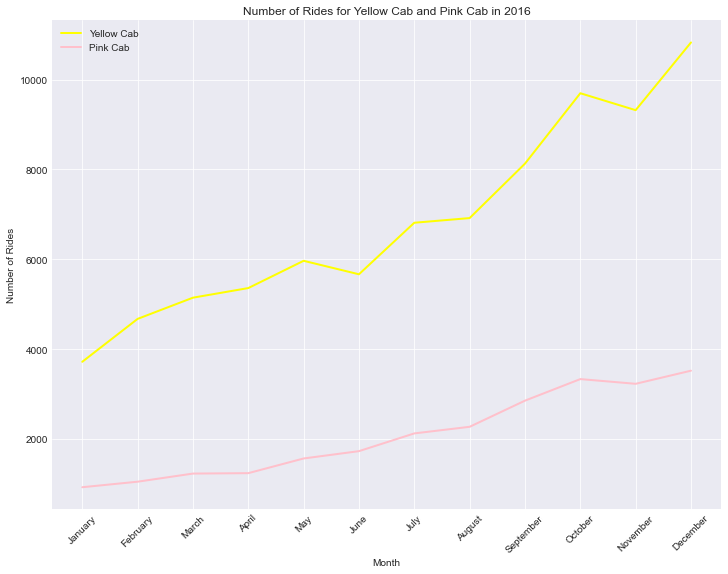

In [59]:
number_of_rides_plotter(data, 2016, 'Yellow Cab', 'Pink Cab')

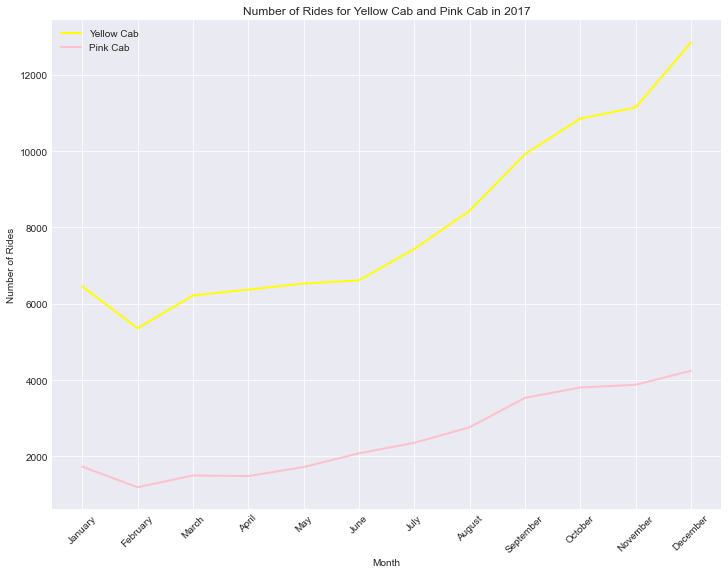

In [60]:
number_of_rides_plotter(data, 2017, 'Yellow Cab', 'Pink Cab')

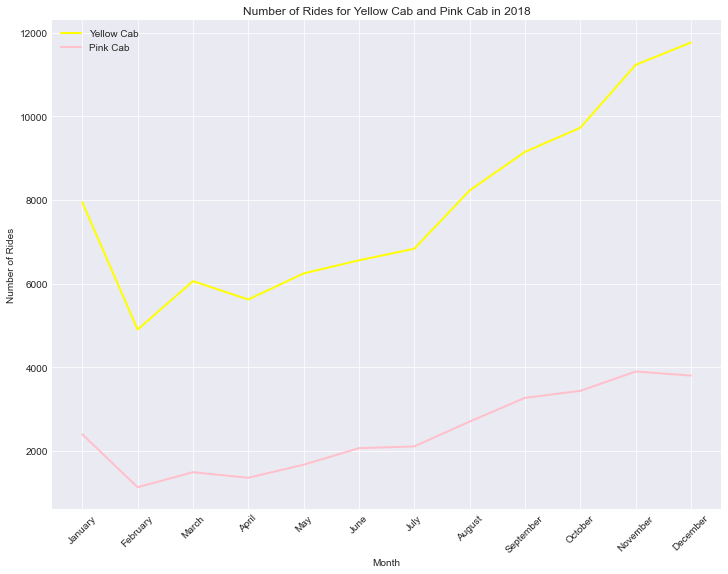

In [61]:
number_of_rides_plotter(data, 2018, 'Yellow Cab', 'Pink Cab')

### Which month is the busiest for the cab companies?
In 2016, there was an upward trend in the number cab rides for each of the companies with yellow cab having more rides in each month as compared to pink cab. 

2017 was similar for both companies. An upward trend, with yellow cab having more rides. But there appeared to be a dip in number rides for the month of February in 2017 for both companies. After which there was a steady rise again to December.

In 2018, a dip was recorded in the month of February again, after which the number to rides started to rise again in the subsequent months. Except for pink cab where they saw a slight dip December 2018. 

Yellow cab tends to have had more rides across then 3 years period. December appears to be the busiest month for both companies across the years. But why, does the number of rides dip in February?

In [62]:
pd.DatetimeIndex(data['Date of Travel']).weekday.unique()

Int64Index([4, 2, 5, 3, 6, 1, 0], dtype='int64', name='Date of Travel')

In [63]:
#Adding day of the week that the rides took place (0 = Monday, 1 = Tuesday and so on..)
data['Weekday'] = data.apply(lambda row: row['Date of Travel'].weekday(), axis = 1)

In [64]:
#data.groupby(['Company', 'Weekday'])['Transaction ID'].count()

In [65]:
print(pd.crosstab(data.Company, data.Weekday))

Weekday         0      1      2      3      4      5      6
Company                                                    
Pink Cab     7032   7077   7076   9549  19249  18253  16475
Yellow Cab  22705  22783  23026  30198  62153  59981  53835


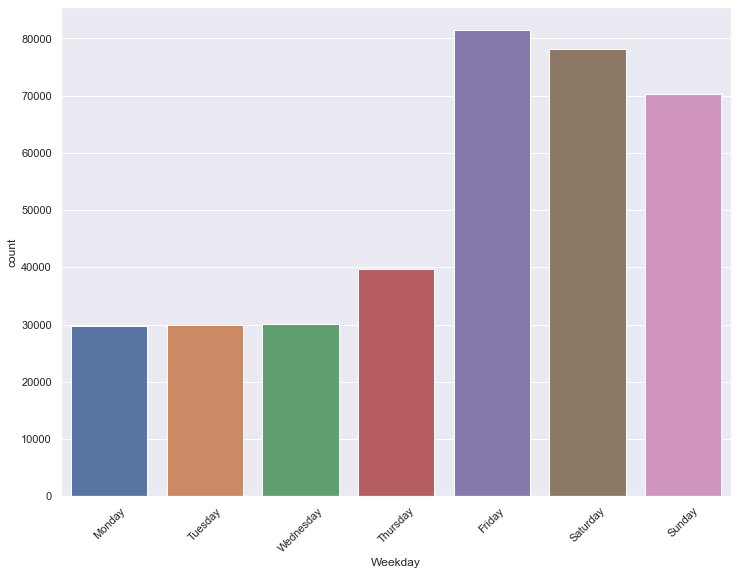

In [66]:
fig = plt.figure(figsize = (12, 9))
sns.set(style="darkgrid")
f = sns.countplot(data = data, x = 'Weekday')
f.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.show()

In [67]:
def num_rides_week(data, year):
    '''A function to plot the number of rides per week across the years'''
    data = data[data['Year'] == year]
    
    
    fig = plt.figure(figsize = (12, 9))
    sns.set(style="darkgrid")
    f = sns.countplot(data = data , x = 'Weekday', hue = 'Company')
    plt.title('Days with the highest rides in the year ' + str(year))
    f.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
    plt.show()

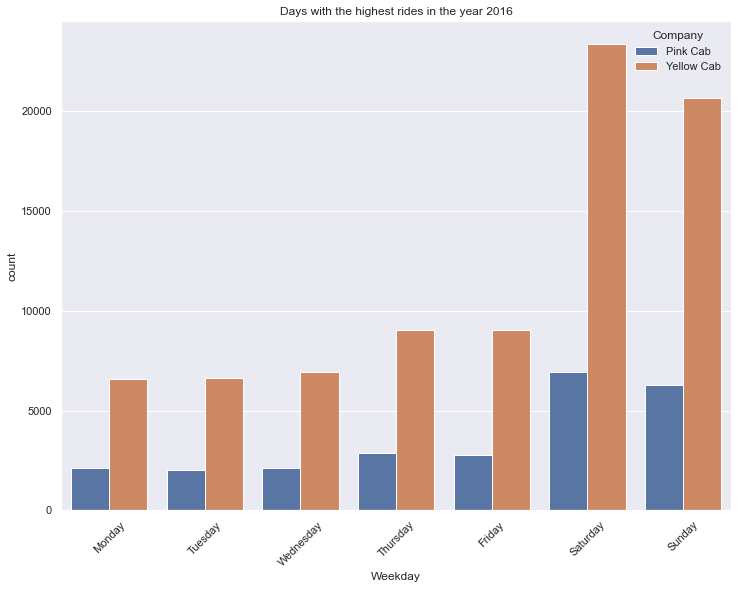

In [68]:
num_rides_week(data, 2016)

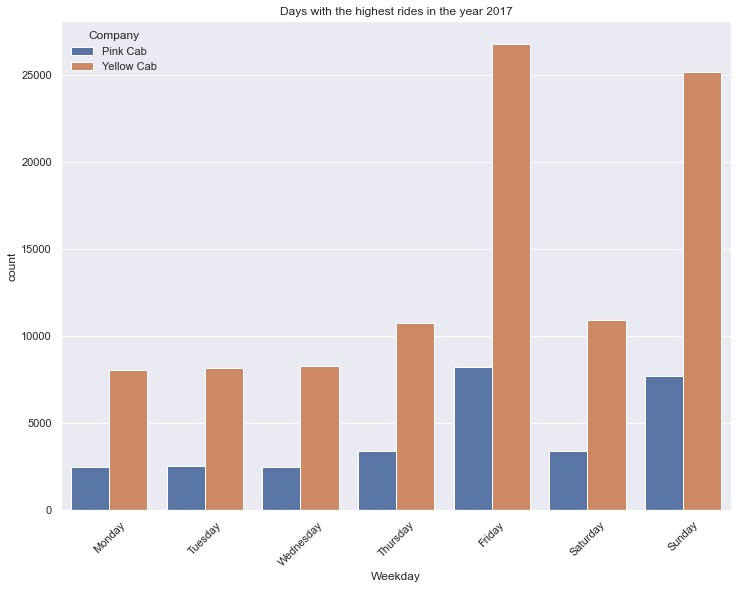

In [69]:
num_rides_week(data, 2017)

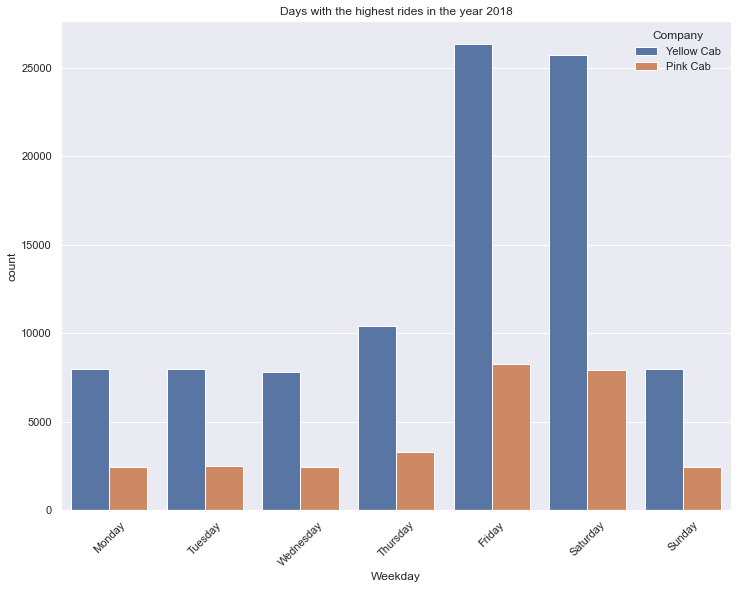

In [70]:
num_rides_week(data, 2018)

### Which days are popular among riders?

From the visualizations above, the weekends (Friday - Sunday) have seen the most number of rides, Friday being the highest across the 3 years.

In 2016, both companies start seeing the number rides increasing from Thursday, through Saturday before dropping on Sunday. Yelll 